인공지능의 세번째 겨울이 찾아올까? http://aidev.co.kr/general/6510

(3Blue1Brown) 신경망이란 무엇인가? | 1장.딥러닝에 관하여 https://www.youtube.com/watch?v=aircAruvnKk

The Universal Approximation Theorem for neural networks https://www.youtube.com/watch?v=Ijqkc7OLenI

A visual proof that neural nets can compute any function http://neuralnetworksanddeeplearning.com/chap4.html

In [2]:
#퍼셉트론 (Perceptron)

import numpy as np

def perceptron (row, weights):
    activation = weights [0] 
    
    for i in range(len(row)-1):
        activation += weights[i+1]*row[i]
        return 1.0 if activation >= 0.0 else 0.0

In [3]:
# AND 게이트
import numpy as np

def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    theta = 0.7
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1

inputData = np.array([[0,0],[1,0],[0,1],[1,1]])
for x in inputData: 
    print(x[0],", ",x[1]," ==> ",AND(x[0],x[1]), sep = '')


0, 0 ==> 0
1, 0 ==> 0
0, 1 ==> 0
1, 1 ==> 1


In [4]:
# [이론예제] OR게이트
import numpy as np

def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    theta = 0.2
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1

inputData = np.array([[0,0],[1,0],[0,1],[1,1]])
for x in inputData: 
    print(x[0],", ",x[1]," ==> ",OR(x[0],x[1]), sep = '')


0, 0 ==> 0
1, 0 ==> 1
0, 1 ==> 1
1, 1 ==> 1


In [5]:
#  NAND게이트
import numpy as np

def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    theta = -0.7
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1

inputData = np.array([[0,0],[1,0],[0,1],[1,1]])
for x in inputData: 
    print(x[0],", ",x[1]," ==> ",NAND(x[0],x[1]), sep = '')


0, 0 ==> 1
1, 0 ==> 1
0, 1 ==> 1
1, 1 ==> 0


In [6]:
# XOR게이트
import numpy as np


def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    theta = 0.2
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1

def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    theta = 0.7
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1


def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    theta = -0.7
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1



def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

inputData = np.array([[0,0],[1,0],[0,1],[1,1]])

for x in inputData: 
    print(x[0],", ",x[1]," ==> ",XOR(x[0],x[1]), sep = '')


0, 0 ==> 0
1, 0 ==> 1
0, 1 ==> 1
1, 1 ==> 0


# 퍼셉트론 (Perceptron)
퍼셉트론은 오늘날 신경망(딥러닝)의 기원이 되는 알고리즘으로, 실제 사람의 뇌를 구성하는 뉴런(Neuron)과 유사하게 동작합니다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d10bd97bbf7815671e38811/Perceptron.png

다만, 퍼셉트론에 흐르는 자극은 실제 전류와는 다르게 신호가 '흐른다/ 안 흐른다 (1/0)'의 두가지 값을 가집니다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d10bdb6bbf7815671e38814/neuron_model.jpeg

(자료출처: cs231n, Stanford University)

이러한 퍼셉트론에 부여되는 적당한 가중치(w: Weight)와 편향(b: Bias)을 찾고, Numpy Array를 이용해서 아래 간단한 AND Gate를 구현하여 봅시다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d12d9f4ab79b17d0ede63b5/AND%20gate%20and%20graph.jpg

    Input (x1)	Input (x2)	Output (Y)
        0	       0	       0
        0	       1	       0
        1	       0	       0
        1	       1	       1
    
### 실습
가중치가 각각 0.5, 0.5라고 주어졌을 때, 가중합과 편향을 더했을 때의 값(output)이 AND gate를 만족하는 bias값을 설정합니다.
(항상 가중치 조합이 0.5, 0.5로 주어지는 것은 아니지만 이번 실습에서는 이렇게 진행하겠습니다.)

hint. 여러가지 숫자를 넣어 가면서 실행해보세요. 실제 딥러닝에서도 컴퓨터도 그런답니다.

입력에 대해 가중합 w1*x1+w2*x2+b를 np.sum을 이용하여 구현합니다.

다음과 같은 출력이 나오도록 Step function으로 return 합니다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d109c7aca3955f75ff729d8/step_function.png

In [6]:

import numpy as np

# AND gate 선언
def AND_gate(x1, x2):
    x = np.array([x1, x2])
    
    # x1과 x2에 각각 곱해줄 Weight를 0.5, 0.5로 설정합니다.
    w = np.array([0.5, 0.5])
    
    # TODO : AND gate를 만족하는 bias를 설정해보세요.
    b = - 0.7
    
    # TODO : 퍼셉트론을 만들어보세요.
    y = np.sum(w*x) + b
    
    # TODO : Step Function을 구현해보세요.
    if y > 0:
        return 1
    else:
        return 0


# AND Gate에 넣어줄 Input입니다.
array = np.array([[0,0], [0,1], [1,0], [1,1]])

# AND Gate를 만족하는지 출력하여 확인합니다.
print('AND Gate 출력')
for x1, x2 in array:
    print('Input: ',x1, x2, ', Output: ',AND_gate(x1, x2))



AND Gate 출력
Input:  0 0 , Output:  0
Input:  0 1 , Output:  0
Input:  1 0 , Output:  0
Input:  1 1 , Output:  1


# 단층 퍼셉트론(Single-Layer Perceptron)
앞선 실습에서는 간단한 AND Gate를 구현해보았습니다. 이처럼 한 개의 퍼셉트론으로 구현한 이 구조를 단층 퍼셉트론이라고 부릅니다.

이번에는 동일한 단층 퍼셉트론에서 매개변수(가중치 w 및 편항 b) 값을 조정하여 OR Gate와 NAND Gate를 구현하여 봅시다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d12db8cab79b17d0ede63c5/OR%20and%20NAND%20gate%20graph.jpg

### 실습
    Input (x1)	Input (x2)	OR Output (y)	NAND Output(y)
           0	       0	       0	        1
           0	       1	       1	        1
           1	       0	       1	        1
           1	       1	       1	        0
위 진리표에 맞게 게이트를 구현해보세요.

(실습 11-1을 참조하며 풀어보세요.)

OR_gate()의 Weight 및 Bias 값을 지정합니다.

NAND_gate() Weight 및 Bias 값을 지정합니다.

각 Gate의 출력이 올바른지 확인해보세요

In [7]:
import numpy as np

# Step function
def step_fn(y):
    if y<=0:
        return 0
    else:
        return 1

# TODO : OR gate 함수를 구현해보세요.
def OR_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.3
    y = np.sum(w*x) + b
    
    return step_fn(y)
        
        
# TODO : NAND gate 함수를 구현해보세요.
def NAND_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5,-0.5])
    b = 1
    y = np.sum(w*x) + b
    
    return step_fn(y)
        
        
# Gate에 넣어줄 Input입니다.
array = np.array([[0,0], [0,1], [1,0], [1,1]])

# OR, NAND Gate를 만족하는지 출력하여 확인해보세요.
print('OR Gate 출력')
for x1, x2 in array:
    print('Input: ',x1, x2, ', Output: ',OR_gate(x1, x2))

print('NAND Gate 출력')
for x1, x2 in array:
    print('Input: ',x1, x2, ', Output: ',NAND_gate(x1, x2))


OR Gate 출력
Input:  0 0 , Output:  0
Input:  0 1 , Output:  1
Input:  1 0 , Output:  1
Input:  1 1 , Output:  1
NAND Gate 출력
Input:  0 0 , Output:  1
Input:  0 1 , Output:  1
Input:  1 0 , Output:  1
Input:  1 1 , Output:  0


# 다층 퍼셉트론 (MLP: Multi-Layer Perceptron)
실습 6-1과 6-2에서는 단 하나의 퍼셉트론으로 매개변수(가중치, 편향)을 조정하여 AND, OR, NAND Gate를 구현하였습니다.

이들은 하나의 직선으로 영역을 나눔으로써 출력을 조정하여 나온 결과라고 할 수 있습니다.

그러면 XOR Gate를 구현하기 위해서는 어떻게 가중치와 편향을 조정하여야 할까요?

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d12e0e9ab79b17d0ede63de/XOR%20vis.jpg

맞습니다. 한 개의 퍼셉트론으로는 하나의 직선으로 영역을 나누기 때문에 XOR Gate 구현이 불가능합니다 :(

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d12e0fcebb19c8b09e3bd47/xor%20mlp.png

하지만, 우리에게는 퍼셉트론을 여러 층으로 쌓아 구현하는 방법이 있습니다. 이번 실습에서는 앞서 구현해본 퍼셉트론 여러 개를 쌓아 XOR Gate를 구현해보겠습니다.

### 실습
미리 구현된 AND OR NAND Gate를 이용하여 XOR Gate를 구현하여 봅시다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d11ee2e6ef262be4168b233/254px_3gate_XOR.jpg

    Input (x1)	Input (x2)	s1	  s2	Output(y)
          0	      0	      0	      1	     0
          0	      1	      1	      1	     1
          1	      0	      1	      1	     1
          1	      1	      1	      0	     0
s1에 OR Gate 의 연산결과를 넣어보세요.

s2에 NAND Gate의 연산결과를 넣어보세요.

s1과 s2를 입력으로 하는 AND Gate 연산을 return해보세요.

결과를 보고 XOR Gate가 잘 구현되었는지 확인해보세요.

In [8]:
import numpy as np

# TODO : 다른 Gate 함수를 이용해 XOR_Gate 함수를 완성해보세요.
def XOR_gate(x1, x2):
    s1 = OR_gate(x1,x2)
    s2 = NAND_gate(x1, x2)
    return AND_gate(s1,s2)   #s1+s2-1 

# Step Function 함수
def step_fn(y):
    if y<=0:
        return 0
    else:
        return 1

# AND Gate 함수입니다.
def AND_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    y = np.sum(w*x) + b
    
    return step_fn(y)
    
# OR Gate 함수입니다.
def OR_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    y = np.sum(w*x) + b
    
    return step_fn(y)
        
# NAND Gate 함수입니다.
def NAND_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    y = np.sum(w*x) + b
    
    return step_fn(y)

# 입력으로 사용될 Array를 만들어줍니다.
array = np.array([[0,0], [0,1], [1,0], [1,1]])

print('XOR Gate 출력')
for x1, x2 in array:
    print('Input: ',x1, x2, ', Output: ', XOR_gate(x1, x2))


XOR Gate 출력
Input:  0 0 , Output:  0
Input:  0 1 , Output:  1
Input:  1 0 , Output:  1
Input:  1 1 , Output:  0


# 활성화 함수 (Activation Function)
지금까지 퍼셉트론을 구현하면서 입력 값들의 가중합이 0 이하일 때는 0을, 그 이상일 때는 1을 출력해주는 **계단 함수(Step Function)**를 써서 구현하였습니다.

이렇게 값에 따라 출력을 정해주는 것을 활성화 한다 라고 하는데요, 계단 함수도 활성화 함수의 일종입니다.

즉, 활성화 함수에도 여러 종류가 있고, 각각 장단점이 있다는 것입니다.

이번 실습에서는 딥러닝에 자주 사용되는 Sigmoid, tanh, ReLU (Rectified linear Unit) 활성화 함수 구현을 해보는 실습을 해보겠습니다.

### 실습
입력 x를 받아와 다음을 출력하는 함수를 작성해보세요.

Sigmoid 를 구현해보세요. (6장 참고)
\sigma(x) = \frac{1}{1 + e^{-(x)}} 

tanh를 구현해보세요.
\tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} 

ReLU를 구현해보세요.
https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d1305ac31ade43bb83d2e2c/relu.svg

TIP! Numpy의 메소드를 이용하여 구현할 수 있습니다.

* np.exp()
* [np.maximum(a, b)] 

[(https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html)]

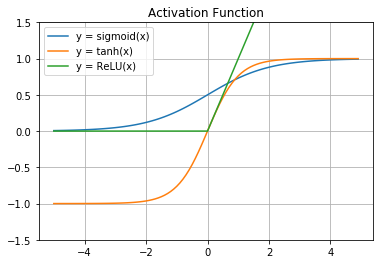

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# TODO : Sigmoid 함수를 구현해보세요.
def sigmoid(x):
    '''x= np.exp(-x)
    return 1/1+x'''
    return  1/(1+np.exp(-x))

# TODO : Tanh 함수를 구현해보세요.
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

# TODO : ReLU 함수를 구현해보세요.
def ReLU(x):
    '''    xary= []
    for i in x:
        if i <= 0:
            xary.append(0)
        else:
            xary.append(i)
    return xary'''
    return [max(0,i) for i in x]
# Activation Function 출력
x = np.arange(-5.0, 5.0, 0.1)
plt.title('Activation Function')
plt.plot(x,sigmoid(x))
plt.plot(x,tanh(x))
plt.plot(x,ReLU(x))
plt.ylim(-1.5, 1.5)
plt.legend(['y = sigmoid(x)', 'y = tanh(x)', 'y = ReLU(x)'])
plt.grid()
# plt.savefig('plot.png')


# DIY 퍼셉트론 만들기
https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d13367dc435254e9a200244/perceptron_node.png

위 그림과 같은 퍼셉트론을 함수로 구현해보겠습니다.

(단, m = 4이며, Numpy 라이브러리를 이용하여 구현)

### 미션
4개의 가중치 w를 0에서 1사이의 임의의 값으로 설정해보세요.

임의의 Bias b를 설정해보세요.

퍼셉트론의 Output y를 구성해보세요.

Activation Function으로 ReLU를 구현해주세요.

In [13]:
import numpy as np


# TODO : ReLU Activation Function을 구현해주세요.
def ReLU(x):
    '''xary= []
    for i in x:
        if i <= 0:
            xary.append(0)
        else:
            xary.append(i)
    return xary'''
    return np.maximum(0,x)
    
# TODO : 4개의 가중치를 갖는 퍼셉트론을 구현하세요.
def perceptron(x):
    w = np.array([0.5,0.3,0.2,0.6])
    b = -0.5
    y = [ float(x[i]*w[i]+b) for i in range(len(x))]
    # TODO : w, b, ReLU를 거친 결과를 Return해주세요.
    return w, b, ReLU(y)

data_input = np.array([1,2,3,4])
w, b, output = perceptron(data_input)
print(output)


[0.  0.1 0.1 1.9]


# Softmax 활성화 함수 만들기
[실습 11-4] 에서 몇가지 활성화 함수를 직접 구현해보았습니다.

이번에는 0과 1 처럼 두 개의 클래스(class) 를 구분해주는 이진 분류 알고리즘이 아닌 여러개의 클래스를 구분해주는 (ex, 이미지에 써있는 숫자를 1부터 10까지 구분)

알고리즘에서 쓰이는 활성화 함수 softmax 함수를 구현해봅시다.

즉, softmax 함수는 앞서 구현해보았던 sigmoid함수의 일반화된 형태라고 볼 수 있고, 각 클래스에 대해서 정규화된(normalized) 확률값을 출력해냅니다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d1430d161fe5c33eb2528da/1_670CdxchunD-yAuUWdI7Bw.png


미션
{softmax(z_i)} = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_i}} (i = 1, ..., n) 

10개의 클래스에 대한 점수 값이 담긴 x가 주어집니다.

softmax() 함수를 구현해보세요.

softmax()의 결과에서 클래스의 확률을 의미하는 max_value와 max_idx를 추출해보세요.

hint : https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

In [14]:
import numpy as np

# TODO : softmax 함수를 구현해보세요.
def softmax(z):
    sumval = np.sum(np.exp(z))
    newz = []
    for i in z:
        newz.append(np.exp(i)/sumval)
    print (newz )
    '''exp = np.exp(z)
    return exp/ np.sum(np.exp(z))'''
    return (newz)

# x는 10개의 Class에 대한 점수를 의미합니다.
x = np.array([11.31035972, 12.77845895, 1.21838455, 11.38083548, 0.70120341,
            14.91212438, 15.98482228,  13.9086965,  5.28312333,  8.44710063])

# TODO : Softmax Activation Function을 거친 결과를 저장해보세요.
result = softmax(x)

# TODO : Softmax를 거친 결과 중 가장 높은 값을 추출해보세요.
max_idx = result.index(max(result))    #np.argmax(result)
max_value = max(result)    #result[max_inx]

print('Softmax 분류 결과 : ', np.round(result,3))
print('클래스 예측 결과 가장 높은 값은 {}로, {}번 클래스입니다.'.format(np.round(max_value,3), max_idx))

[0.006106767850787259, 0.02650933327106107, 2.528845417528338e-07, 0.0065526752402883985, 1.5076945588201964e-07, 0.22389166576598996, 0.6544925482606249, 0.08208328642342573, 1.4730446302196967e-05, 0.0003485890875228083]
Softmax 분류 결과 :  [0.006 0.027 0.    0.007 0.    0.224 0.654 0.082 0.    0.   ]
클래스 예측 결과 가장 높은 값은 0.654로, 6번 클래스입니다.
